In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
import prince
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df_raw = pd.read_csv('../data/raw/problem_merged_data.csv')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df_raw.drop('cpe', axis=1), df_raw.get('cpe'), test_size=0.25, random_state=0, shuffle=True)

df_train = pd.concat([x_train, y_train], axis=1)

In [4]:
x_train.date.value_counts()

date
2022-02-28    11
2022-07-06     8
2022-03-10     8
2022-04-27     8
2022-04-21     8
              ..
2022-01-17     1
2022-08-15     1
2022-09-05     1
2022-03-04     1
2022-10-09     1
Name: count, Length: 352, dtype: int64

In [5]:
for category in x_train.IABCategory.unique():
    print(f'{category}: {x_train[x_train.IABCategory == category].group.nunique()} unique group entries.')

Travel: 2 unique group entries.
Medical Health: 2 unique group entries.
Business and Finance: 5 unique group entries.
News and Politics: 1 unique group entries.


In [6]:
for col in ['headline', 'storySummary', 'IABCategory']:
    print(f'{col}:', end='\n')
    for category in x_train[col].unique():
        print(f'{category}: {x_train[x_train[col] == category].group.nunique()} unique group entries.')

headline:
Plan a Spring Wildflower Walk in Sonoma County: 1 unique group entries.
Access Our AFib Guide: 1 unique group entries.
Gain complete visibility in a multicloud world: 1 unique group entries.
Free AFib Treatment Guide: 1 unique group entries.
How to Remain Secure with Remote & Hybrid Work: 1 unique group entries.
Sonoma's Family Farm and Cheesemaking Business: 1 unique group entries.
Read more about how you can prevent cyberattacks: 1 unique group entries.
7 Employer Tips to Avoid Employee Burnout: 1 unique group entries.
Get a Second Opinion from the Nation's Best: 1 unique group entries.
How to Avoid Employee Burnout: 1 unique group entries.
How Pollution is Affecting the Western Arctic: 1 unique group entries.
7 Tips to Have a Successful Roadside Inspection: 1 unique group entries.
Celebrate Wine Month in Sonoma County: 1 unique group entries.
The Sonoma County Guide to Wellness: 1 unique group entries.
The Most Unique Spa and Wellness Activities: 1 unique group entries.
As

Count on AAA To Be There For You. Get 50% Off Now: 1 unique group entries.
See Why This Midwest Farmer Switched to Enlist®: 1 unique group entries.
Sonoma County Farm Ties Inclusivity into Food: 1 unique group entries.
5 Ways to Protect Your 2022 Seed Investment: 1 unique group entries.
Try a Spring Day Trip in Sonoma County: 1 unique group entries.
The Art of Working with Building Inspectors: 1 unique group entries.
Meet the Local Makers and Artisans in Sonoma: 1 unique group entries.
Travel Safely With AAA By Your Side. 50% Off Today: 1 unique group entries.
Is your network fully protected?: 1 unique group entries.
Gay Winemaker Embraced by Sonoma County Community: 1 unique group entries.
Peace of Mind with AAA Roadside Service. Join Now: 1 unique group entries.
See how a healthy body can lead to a healthy mind: 1 unique group entries.
Read how oil drilling can destroy the Everglades: 1 unique group entries.
Have an Outdoor Adventure in Sonoma County: 1 unique group entries.
Remote W

Each `storySummary` or `headline` has a single group entry associated with it. `storySummary` and `headline` both define, independent of each other, the group entry. `IABCategory` may have multiple groups associated with it.

In [7]:
for col in ['headline', 'storySummary', 'IABCategory']:
    print(f'{col}:', end='\n')
    for group in x_train.group.unique():
        print(f'{group}: {x_train[x_train.group == group][col].nunique()} unique {col} entries.')

headline:
50: 15 unique headline entries.
45: 3 unique headline entries.
53: 10 unique headline entries.
57: 12 unique headline entries.
75: 4 unique headline entries.
65: 6 unique headline entries.
83: 3 unique headline entries.
37: 5 unique headline entries.
66: 2 unique headline entries.
storySummary:
50: 13 unique storySummary entries.
45: 2 unique storySummary entries.
53: 4 unique storySummary entries.
57: 5 unique storySummary entries.
75: 2 unique storySummary entries.


65: 2 unique storySummary entries.
83: 2 unique storySummary entries.
37: 1 unique storySummary entries.
66: 1 unique storySummary entries.
IABCategory:
50: 2 unique IABCategory entries.
45: 1 unique IABCategory entries.
53: 1 unique IABCategory entries.
57: 1 unique IABCategory entries.
75: 1 unique IABCategory entries.
65: 1 unique IABCategory entries.
83: 1 unique IABCategory entries.
37: 1 unique IABCategory entries.
66: 1 unique IABCategory entries.


`group` entry may be associated with multiple `headline`, `storySummary` or `IABCategory`.

In [8]:
from typing import Union, Tuple, Any, Dict
import re
def get_regions(row: iter) -> Union[str, None]:

    pattern = r'"regionName":"([^"]+)"'

    matches = re.finditer(pattern, str(row))

    if matches:
        try:
            return [match.group(1).split(', ')[1] for match in matches]
        except IndexError:
            return [match.group(1).split(', ')[0] for match in matches]
    else:
        return None

x_train_preproc = x_train.assign(
    regionName=x_train.targetGeo.apply(lambda row: get_regions(row)),
    )

pd.get_dummies(x_train_preproc.regionName.explode().dropna())

AZ  Arizona  Arkansas     CA  California  Colorado  DC (Hagerstown)  \
963   False    False     False  False        True     False            False   
963   False    False     False  False       False     False            False   
963   False    False     False  False       False     False            False   
963   False    False     False  False       False     False            False   
963   False    False     False  False       False     False            False   
...     ...      ...       ...    ...         ...       ...              ...   
1383  False    False     False  False       False     False            False   
1383  False    False     False  False       False     False            False   
1383  False    False     False  False       False     False            False   
1383  False    False     False  False       False     False            False   
1383  False    False     False  False       False     False            False   

      Dallas-Ft. Worth  Denver  Georgia  Idaho  Illinois  Indiana   Iowa  \
963              False   False    False  False     False    False  False   
963               True   False    False  False     False    False  False   
963              False    True    False  False     False    False  False   
963              False   False    False  False     False    False  False   
963              False   False    False  False     False    False  False   
...                ...     ...      ...    ...       ...      ...    ...   
1383             False   False    False  False     False    False  False   
1383             False   False    False  False     False    False  False   
1383             False   False    False  False     False    False  False   
1383             False   False    False  False     False    False  False   
1383             False   False    False  False     False    False  False   

      Kansas  Kentucky  Las Vegas  Los Angeles  Louisiana     MD  Maine  \
963    False     False      False        False      False  False  False   
963    False     False      False        False      False  False  False   
963    False     False      False        False      False  False  False   
963    False     False       True        False      False  False  False   
963    False     False      False         True      False  False  False   
...      ...       ...        ...          ...        ...    ...    ...   
1383   False     False      False        False      False  False  False   
1383   False     False      False        False      False  False  False   
1383   False     False      False        False      False  False  False   
1383   False     False      False        False      False  False  False   
1383   False     False      False        False      False  False  False   

      Michigan  Minnesota  Mississippi  Missouri  Montana     NV  Nebraska  \
963      False      False        False     False    False  False     False   
963      False      False        False     False    False  False     False   
963      False      False        False     False    False  False     False   
963      False      False        False     False    False  False     False   
963      False      False        False     False    False  False     False   
...        ...        ...          ...       ...      ...    ...       ...   
1383     False      False        False     False    False  False     False   
1383     False      False        False     False    False  False     False   
1383     False      False        False     False    False  False     False   
1383     False      False        False     False    False  False     False   
1383     False      False        False     False    False  False     False   

      Nevada  New Hampshire  New Mexico  North Carolina  North Dakota     OH  \
963    False          False       False           False         False  False   
963    False          False       False           False         False  False   
963    False          False       False           False  

Region information is a mixture of cities and state (full name or abbreviations).

In [9]:
def get_region_ids(row: iter) -> Union[str, None]:

    pattern = r'"regionId":"([^"]+)"'

    matches = re.finditer(pattern, str(row))

    if matches:
        return [match.group(1) for match in matches]
    else:
        return None

pd.get_dummies(x_train.targetGeo.apply(lambda row: get_region_ids(row)).explode().dropna())

2347559  2347561  2347562  2347563  2347564  2347569  2347571  2347572  \
963     False    False    False     True    False    False    False    False   
963     False    False    False     True    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   

      2347573  2347574  2347575  2347576  2347577  2347578  2347581  2347582  \
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   

      2347583  2347584  2347585  2347586  2347587  2347588  2347590  2347592  \
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   

      2347593  2347594  2347595  2347596  2347597  2347600  2347601  2347602  \
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
963     False    False    False    False    False    False    False    False   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1383    False    False    False    False    False    False     True    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   
1383    False    False    False    False    False    False    False    False   

      2347603  2347604  2347605  2347608  2347609  24700963  24700964  \
963     False    False    False    False    False     False     False   
963     False   

Region IDs are also a mixture of a numeric code or US state abbreviations.

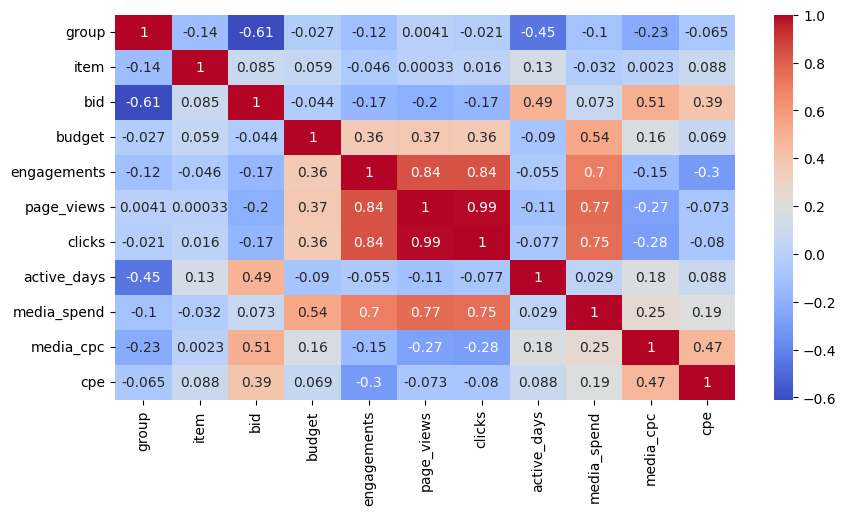

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
def apply_boxcox_transformation(df: pd.DataFrame, col: str) -> pd.DataFrame:

    fig = plt.figure(figsize=(15, 2))

    ax1 = fig.add_subplot(121)
    prob = stats.probplot(df[col], dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title(f'Probplot for {col} against normal distribution')
    #Using boxcox to transform the data so it’s closest to normal distribution
    ax2 = fig.add_subplot(122)
    df[f'{col}_boxcox'], _ = stats.boxcox(df[col])
    stats.probplot(df[f'{col}_boxcox'], dist=stats.norm, plot=ax2)
    ax2.set_title(f'Probplot for {col} after Box-Cox transformation')
    plt.tight_layout()
    plt.show()

    return df

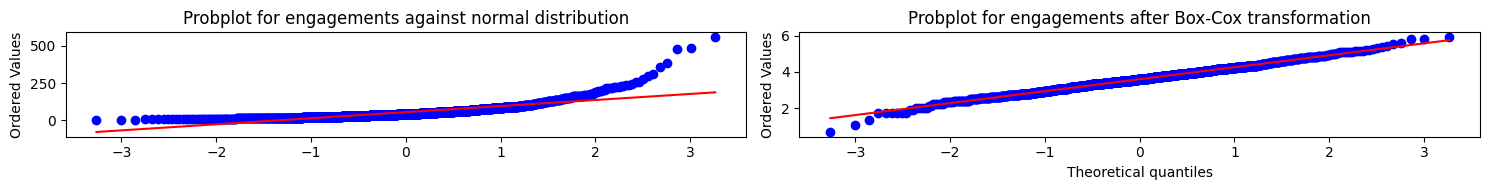

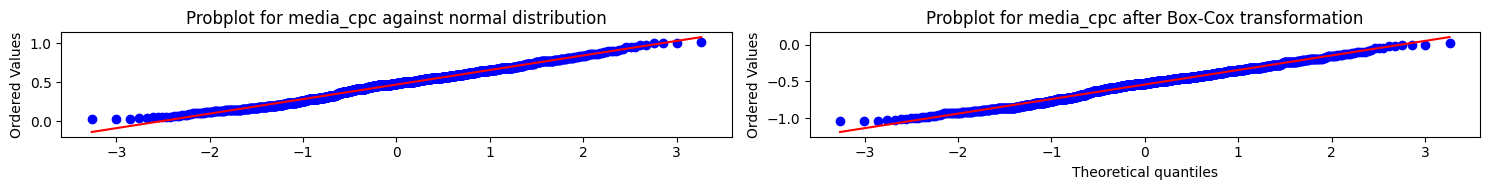

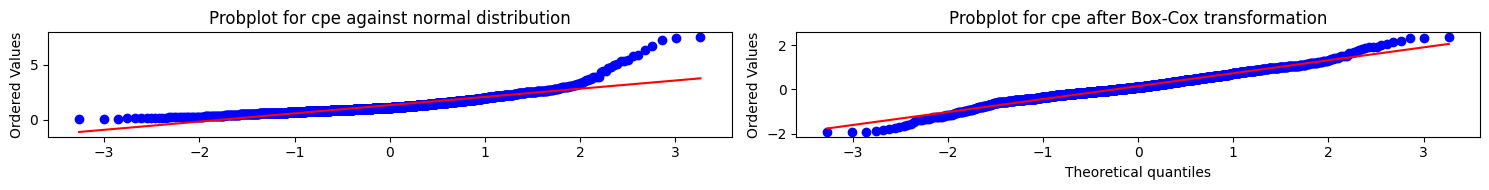

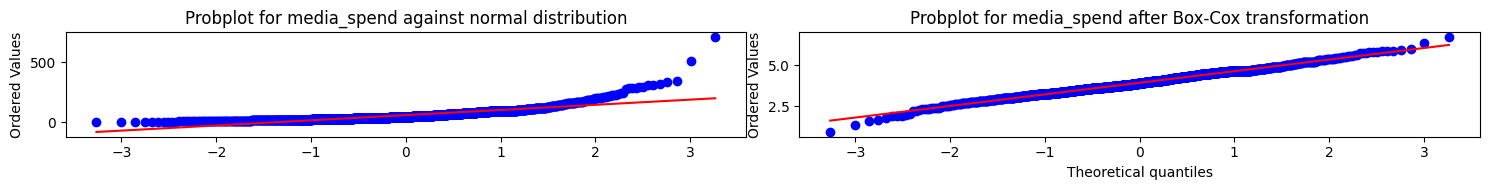

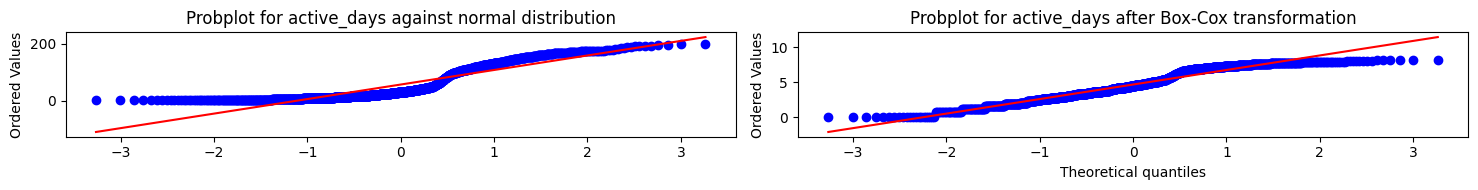

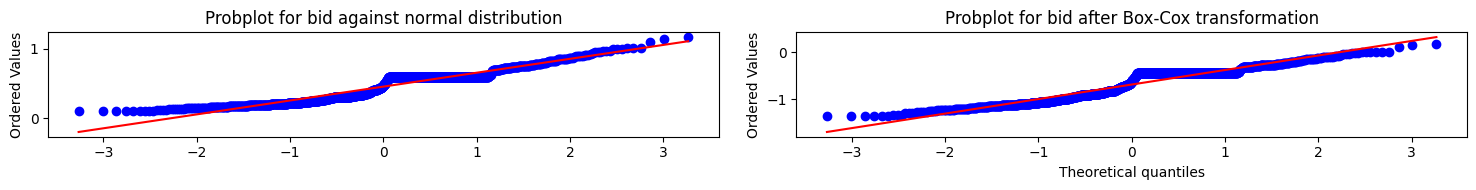

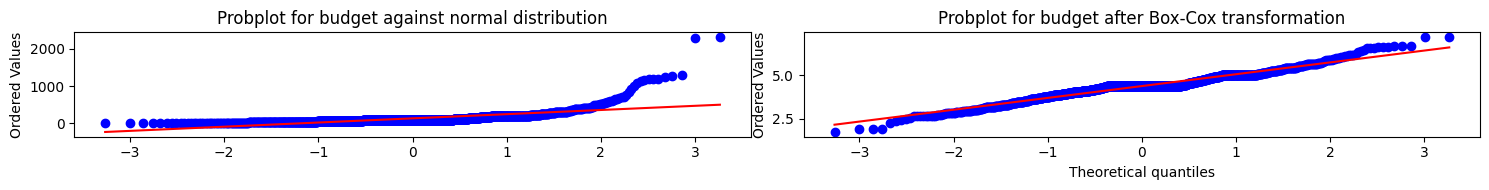

In [12]:
for col in ['engagements', 'media_cpc', 'cpe', 'media_spend', 'active_days', 'bid', 'budget']:
    apply_boxcox_transformation(df_train, col)

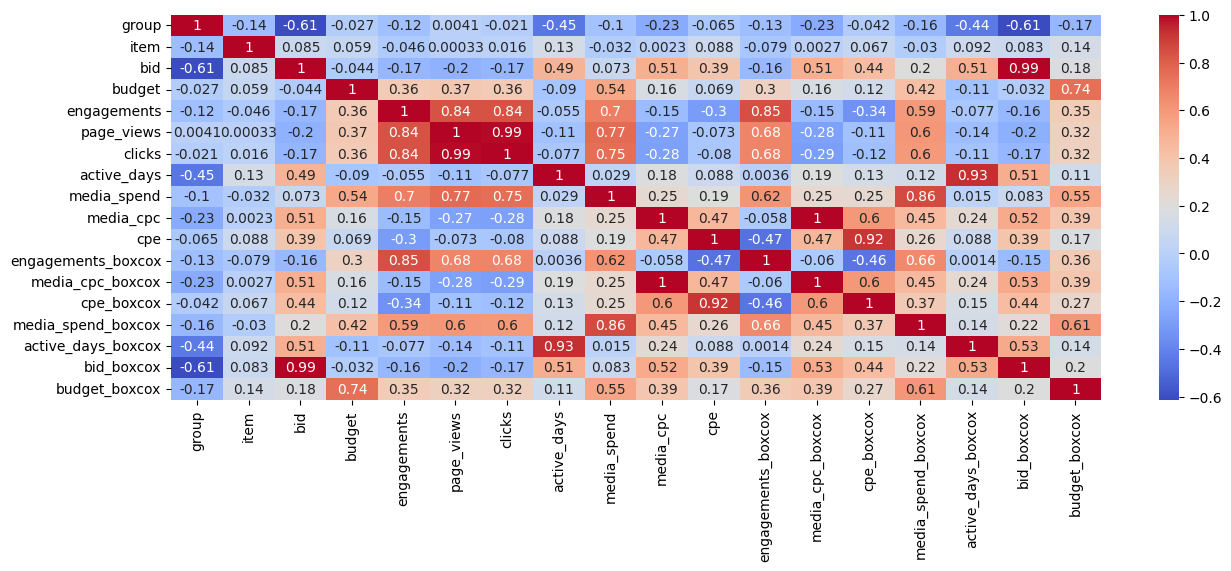

In [13]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_train.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.show()

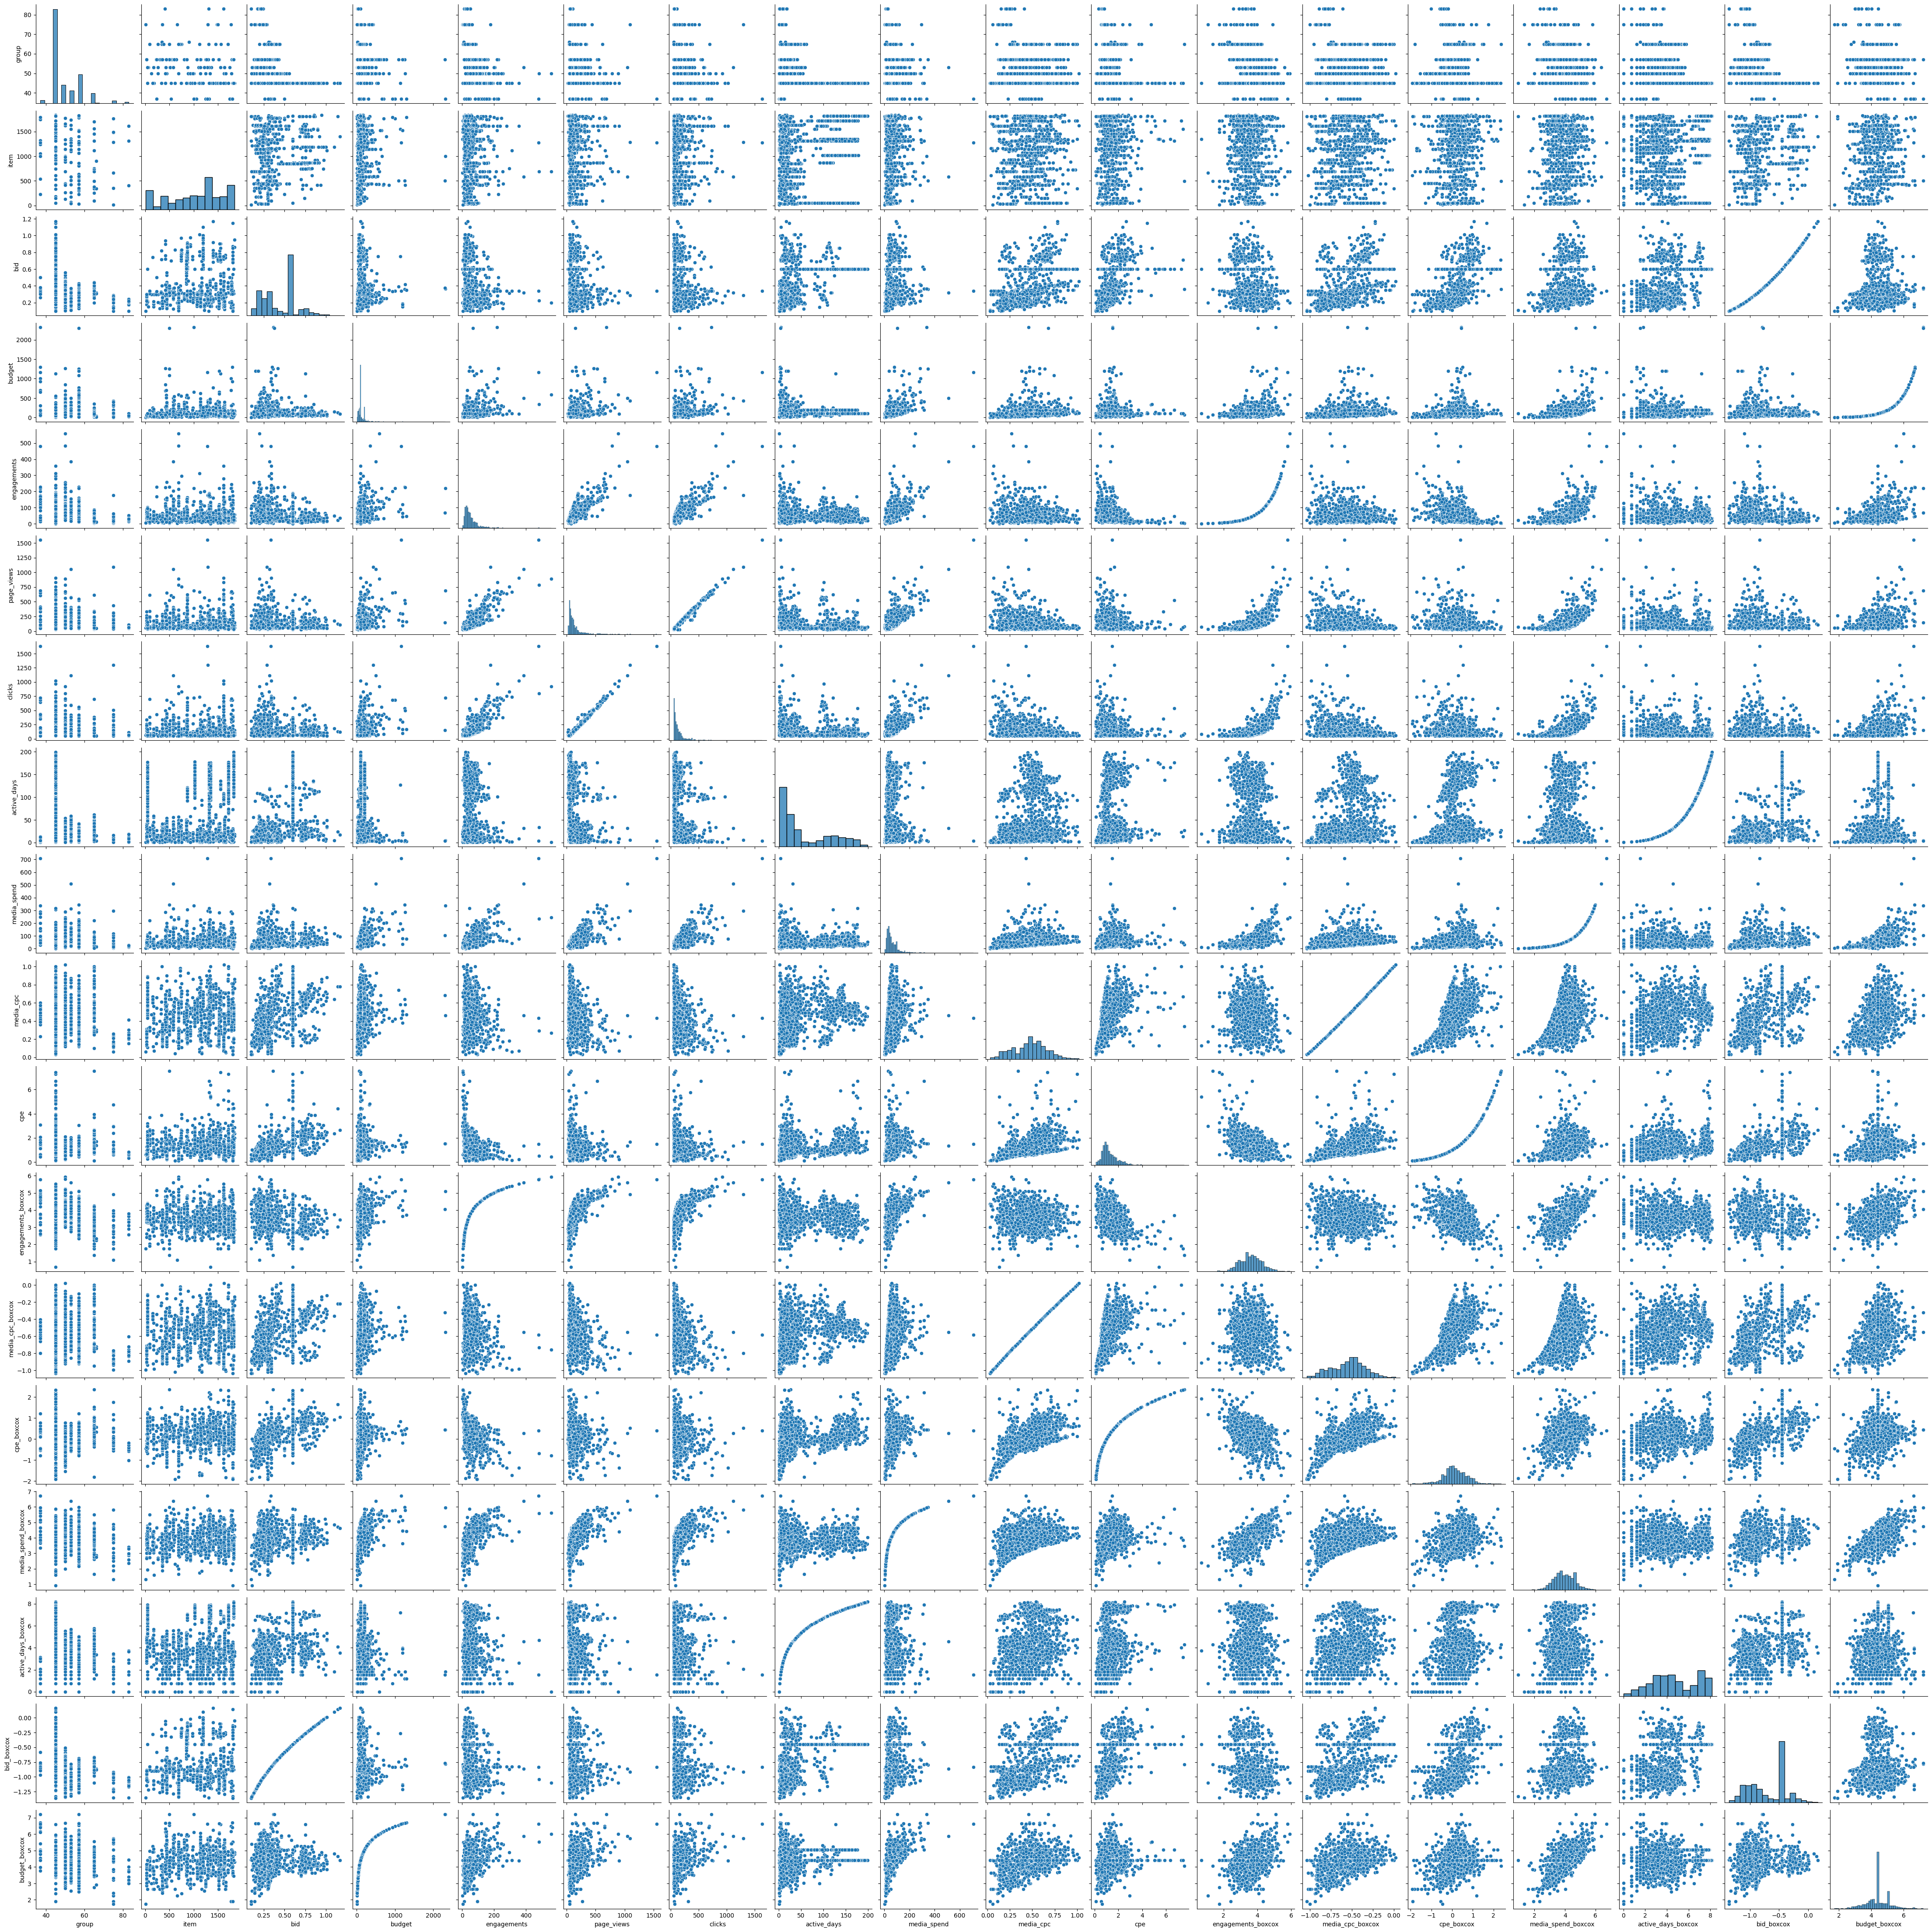

In [14]:
sns.pairplot(df_train)
plt.show()

In [15]:
x_train.targetInterest.value_counts()

targetInterest
{"channelId":"YAHOO","channelName":"Yahoo","interestId":"oath3p:52948934","interestName":"Hypertension Propensity - Reach Tier 1 [3rd Party Data > Adstra (ALC) > Syndicated > Health & Wellness > Disease Propensity by Type/Rx Use]","interestDescription":"Individuals likely to have a Cardiovascular condition, such as Hypertension, that is treated with a Prescription/Rx medication, who fall into Reach Tier 1.","interestType":"oath3p"};                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

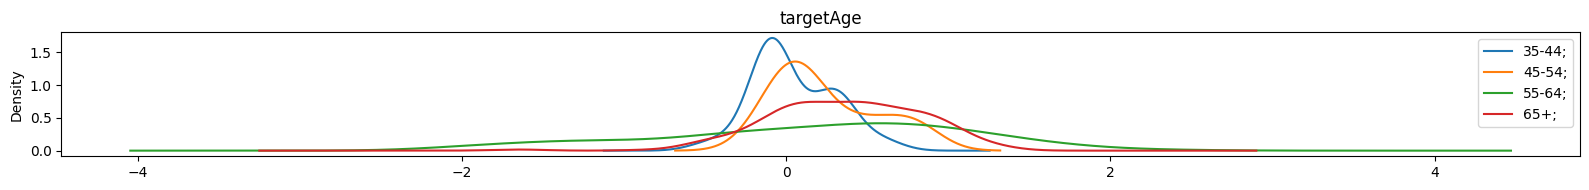

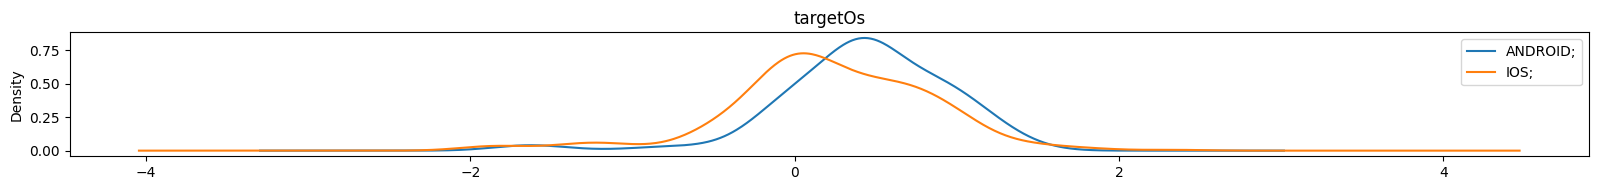

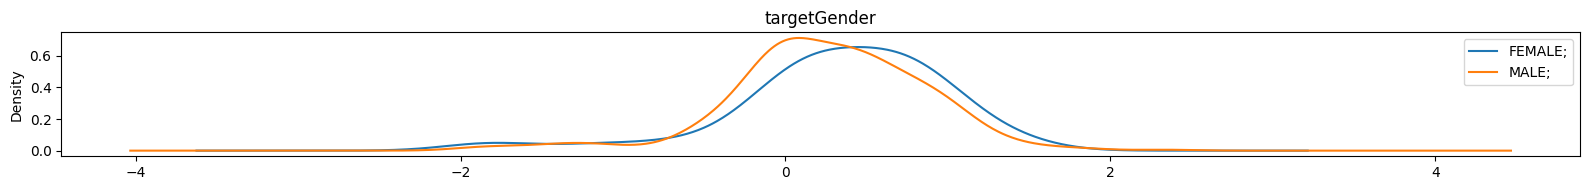

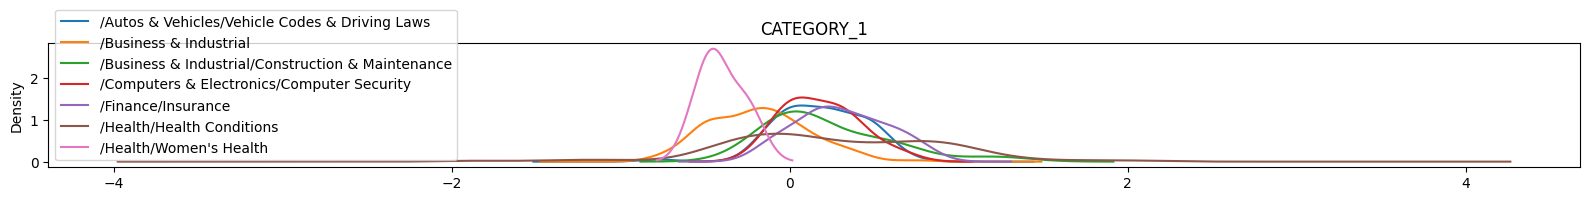

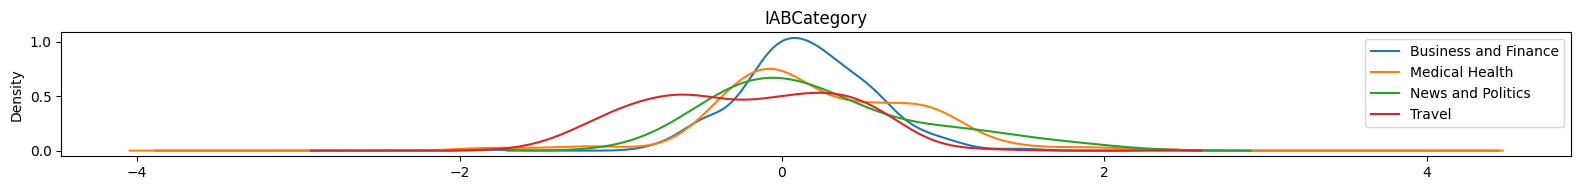

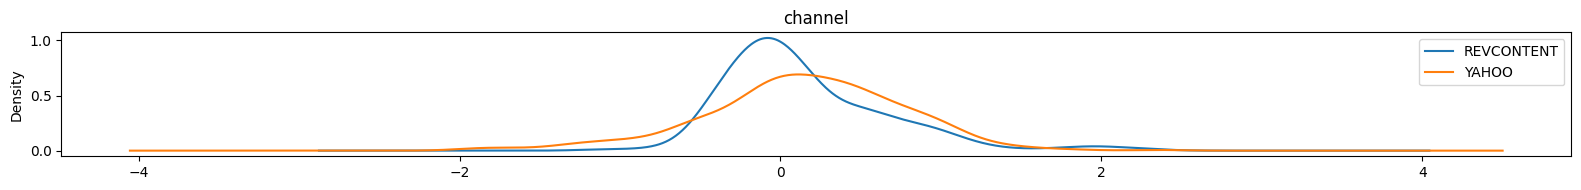

In [20]:
for col in ['targetAge', 'targetOs', 'targetGender', 'CATEGORY_1', 'IABCategory', 'channel']:
    plt.figure(figsize=(16, 2))
    df_train.groupby(col)['cpe_boxcox'].plot(kind='kde', legend=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

cols_to_transform = ['active_days_boxcox', 'bid_boxcox', 'budget_boxcox']
scaler = StandardScaler()
df_train_numeric_std = pd.DataFrame(
    scaler.fit_transform(df_train[cols_to_transform]),
    index=df_train.index,
    columns=[f"{col}_std" for col in cols_to_transform]
    )

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_train = df_train.assign(
    headline_storySummary=df_train['headline'] + '. ' + df_train['storySummary']
)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_train.headline_storySummary)
df_train_text = pd.DataFrame(
    X.toarray(), index=df_train.index, columns=vectorizer.get_feature_names_out()
    )
df_train_text

2022   50  aaa  academic    access  achadinha  actions  activities  \
963    0.0  0.0  0.0  0.000000  0.000000        0.0      0.0         0.0   
218    0.0  0.0  0.0  0.000000  0.431245        0.0      0.0         0.0   
1178   0.0  0.0  0.0  0.000000  0.000000        0.0      0.0         0.0   
924    0.0  0.0  0.0  0.000000  0.201995        0.0      0.0         0.0   
1503   0.0  0.0  0.0  0.000000  0.000000        0.0      0.0         0.0   
...    ...  ...  ...       ...       ...        ...      ...         ...   
835    0.0  0.0  0.0  0.258894  0.000000        0.0      0.0         0.0   
1216   0.0  0.0  0.0  0.000000  0.000000        0.0      0.0         0.0   
1653   0.0  0.0  0.0  0.000000  0.000000        0.0      0.0         0.0   
559    0.0  0.0  0.0  0.000000  0.201995        0.0      0.0         0.0   
684    0.0  0.0  0.0  0.000000  0.431245        0.0      0.0         0.0   

      actors  advancing  adventure  affecting  affects      afib  ahead  \
963      0.0        0.0        0.0   0.000000      0.0  0.000000    0.0   
218      0.0        0.0        0.0   0.000000      0.0  0.431245    0.0   
1178     0.0        0.0        0.0   0.000000      0.0  0.000000    0.0   
924      0.0        0.0        0.0   0.000000      0.0  0.403990    0.0   
1503     0.0        0.0        0.0   0.000000      0.0  0.000000    0.0   
...      ...        ...        ...        ...      ...       ...    ...   
835      0.0        0.0        0.0   0.000000      0.0  0.000000    0.0   
1216     0.0        0.0        0.0   0.000000      0.0  0.000000    0.0   
1653     0.0        0.0        0.0   0.243383      0.0  0.000000    0.0   
559      0.0        0.0        0.0   0.000000      0.0  0.403990    0.0   
684      0.0        0.0        0.0   0.000000      0.0  0.431245    0.0   

      alana  alaska  alike  alleviate  american  animals   answers  \
963     0.0     0.0    0.0        0.0       0.0      0.0  0.000000   
218     0.0     0.0    0.0        0.0       0.0      0.0  0.215622   
1178    0.0     0.0    0.0        0.0       0.0      0.0  0.000000   
924     0.0     0.0    0.0        0.0       0.0      0.0  0.201995   
1503    0.0     0.0    0.0        0.0       0.0      0.0  0.000000   
...     ...     ...    ...        ...       ...      ...       ...   
835     0.0     0.0    0.0        0.0       0.0      0.0  0.000000   
1216    0.0     0.0    0.0        0.0       0.0      0.0  0.000000   
1653    0.0     0.0    0.0        0.0       0.0      0.0  0.000000   
559     0.0     0.0    0.0        0.0       0.0      0.0  0.201995   
684     0.0     0.0    0.0        0.0       0.0      0.0  0.215622   

      applications  approach    arctic  art  artisans  artistically  \
963       0.000000       0.0  0.000000  0.0       0.0           0.0   
218       0.000000       0.0  0.000000  0.0       0.0           0.0   
1178      0.213842       0.0  0.000000  0.0       0.0           0.0   
924       0.000000       0.0  0.000000  0.0       0.0           0.0   
1503      0.000000       0.0  0.000000  0.0       0.0           0.0   
...            ...       ...       ...  ...       ...           ...   
835       0.000000       0.0  0.000000  0.0       0.0           0.0   
1216      0.213842       0.0  0.000000  0.0       0.0           0.0   
1653      0.000000       0.0  0.473499  0.0       0.0           0.0   
559       0.000000       0.0  0.000000  0.0       0.0           0.0   
684       0.000000       0.0  0.000000  0.0       0.0           0.0   

      artxcursion  asian    assure  attacks  attempt  avoid  award  bad  ball  \
963           0.0    0.0  0.000000      0.0      0.0    0.0    0.0  0.0   0.0   
218           0.0    0.0  0.000000      0.0      0.0    0.0    0.0  0.0   0.0   
1178          0.0    0.0  0.213842      0.0      0.0    0.0    0.0  0.0   0.0   
924           0.0    0.0  0.000000      0.0      0.0    0.0    0.0  0.0   0.0   
1503          0.0    0.0  0.000000      0.0      0.0    0.0    0.0  0.0   0.0   
...         

In [74]:
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="ignore"
)

dataset_for_famd = pd.concat([df_train[
    ['channel', 'targetAge', 'targetOs', 'targetGender', 'CATEGORY_1', 'IABCategory', ]
    ], df_train_numeric_std, df_train_text], axis=1)

famd = famd.fit(dataset_for_famd)
reduced_dim = famd.transform(dataset_for_famd)

famd.plot(
    dataset_for_famd,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_column_labels=True,
)
# reduced_dim

alt.LayerChart(...)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, [0])
    ])

preprocessor.fit_transform(x_train[['targetAge', 'targetOs', 'targetGender', 'CATEGORY_1']])